In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [90]:
data = pd.read_csv("./data/망고플레이트전국댓글.csv")

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658251 entries, 0 to 658250
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   리뷰내용    657292 non-null  object
 1   작성자명    657680 non-null  object
 2   후기점수    658251 non-null  object
 3   url     658251 non-null  object
 4   ID      658251 non-null  object
dtypes: object(5)
memory usage: 25.1+ MB


In [92]:
data.head()

,리뷰내용,작성자명,후기점수,url,ID
0,맛있네요,-,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
1,가로수길,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
2,맛있어요,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
3,언제와도 맛있는 미라이!!!고등어산도는 무조건 시켜야하구요.. (식빵 뭔지 궁금) ...,스틱스강에맹세하는맛집,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
4,"아와이 야끼소바,사바산도,우니 아마에비 호다테먹었어요.나마비루도 함께^^나마비루 부...",ㅇㅇ,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO


In [93]:
data['ID'].nunique()

5744

In [94]:
(data.duplicated(['리뷰내용', '작성자명']) == False).sum()

93320

In [95]:
data = data.drop_duplicates(['리뷰내용','작성자명'])

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93320 entries, 0 to 658250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰내용    93180 non-null  object
 1   작성자명    93282 non-null  object
 2   후기점수    93320 non-null  object
 3   url     93320 non-null  object
 4   ID      93320 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB


In [97]:
data['ID'].nunique()

5742

In [98]:
revire_counts = data.groupby('ID')[['리뷰내용']].count()

In [99]:
revire_counts

,리뷰내용
ID,
--IQdCMyShbu,6
--PbUbWkr5xp,2
-0aeDar1Ie,8
-0iuKSUEFRvZ,13
-1LZImufBV8E,3
...,...
zwRLQ9Byr2,6
zxgTXotiK5bQ,1
zxqKlZqoho,4


In [100]:
revire_counts.sort_values(by='리뷰내용', ascending=False)

,리뷰내용
ID,
s6C_cdBQX0rj,372
1pmv75vVQx,287
fPi6OZ3r-u,246
y-_XMRSTNrAi,241
gL8RksQTNk,239
...,...
nwykgqfbYx,1
AzIdNOqU_tl3,1
noi8A_NGrRBL,1


In [101]:
over20revies = revire_counts[revire_counts['리뷰내용'] > 20]

In [102]:
over20revies

,리뷰내용
ID,
-1rMxmPWvg,32
-1yzcgbtF5,96
-9jLnAAJZc,25
-D6qxV9cg9mT,23
-EDDtVfafvaS,29
...,...
zYzhPaX003,69
z_sD7nAsh7V0,51
zq9bIKh6PMLV,37


In [103]:
print(type(over20revies))

<class 'pandas.core.frame.DataFrame'>


In [104]:
over20revies_shops = over20revies.index

In [105]:
over20revies_shops

Index(['-1rMxmPWvg', '-1yzcgbtF5', '-9jLnAAJZc', '-D6qxV9cg9mT',
       '-EDDtVfafvaS', '-G-YWwpe9D', '-LWflJV1maU2', '-SMNjUsH3i',
       '-SvQDki5HNzQ', '-UUbd93wKH0H',
       ...
       'zNVXE1__XF', 'zOOlz9vfJfFF', 'zSujg5KWKY1W', 'zSxicuDvNH',
       'zWVgSFqWIQrj', 'zYzhPaX003', 'z_sD7nAsh7V0', 'zq9bIKh6PMLV',
       'ztTTr81jaBm7', 'zv1rcsrmRU4S'],
      dtype='object', name='ID', length=1117)

전체 데이터에서 over20revies_shops 에 해당하는 가게만 필터링 해서 새로운 데이터 프레임 만들기

In [106]:
data

,리뷰내용,작성자명,후기점수,url,ID
0,맛있네요,-,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
1,가로수길,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
2,맛있어요,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
3,언제와도 맛있는 미라이!!!고등어산도는 무조건 시켜야하구요.. (식빵 뭔지 궁금) ...,스틱스강에맹세하는맛집,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
4,"아와이 야끼소바,사바산도,우니 아마에비 호다테먹었어요.나마비루도 함께^^나마비루 부...",ㅇㅇ,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
...,...,...,...,...,...
658246,짜고..달고..짬뽕전문점이래서 믿고갔드니만,limkkk,별로,https://www.mangoplate.com/restaurants/2xEW0lARGv,2xEW0lARGv
658247,서비스도 나쁘지 않고 일단 고기 맛이 좋아서 다시 가고 싶은 곳이예요. 다른 ...,maria287555,맛있다,https://www.mangoplate.com/restaurants/qJfguC-...,qJfguC-XoNK_
658248,"먼길을 찾아서 갈만한 맛집인지는 모르겠지만, 동네에 이런 집이 있었으면 한다. 밀면...",김사과,맛있다,https://www.mangoplate.com/restaurants/rXhoe55...,rXhoe55y323s
658249,"착한 가격 분식집 : 보리밥,칼국수허름한 가정집에서 보리밥에 된장 비벼 김치 하나와...",석양의 이야기,괜찮다,https://www.mangoplate.com/restaurants/dj7Azd0jH7,dj7Azd0jH7


In [107]:
over20df = data[data['ID'].apply(lambda x: x in over20revies_shops)]

리뷰내용 길이가 4 이상인 리뷰만 남김

In [108]:
over20df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60673 entries, 0 to 657696
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰내용    60559 non-null  object
 1   작성자명    60644 non-null  object
 2   후기점수    60673 non-null  object
 3   url     60673 non-null  object
 4   ID      60673 non-null  object
dtypes: object(5)
memory usage: 2.8+ MB


In [109]:
over20df['리뷰내용'] = over20df['리뷰내용'].astype('str')

C:\Users\HSM\AppData\Local\Temp\ipykernel_11684\3256979473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over20df['리뷰내용'] = over20df['리뷰내용'].astype('str')


In [110]:
# 리뷰내용 길이가 4 이상인 데이터만 저장
over20df = over20df[over20df['리뷰내용'].apply(len) >= 4]

In [111]:
over20df['ID'].nunique()

1117

ID별로 변수를 생성하고 ID별 데이터 프레임 생성
* globals()를 이용해 자동으로 변수 만들기
* globals()['변수명']


In [112]:
# 변수를 만들때는 문자열 포멧팅으로 만들 수 없음
# for index, name in enumerate(over20revies_shops):
#     f"test{index}" = data[data['ID'] == name]
    

In [113]:
over20df['ID'] = over20df['ID'].str.replace("-", "_")

In [114]:
ids = list(set(over20df['ID']))

In [122]:
len(ids)

1117

In [124]:
ids[3]

'FMiCE19Sbgm8'

In [129]:
def dfbyid(ids):
    dfs = []
    for idx, id_name in enumerate(ids):
        globals()[f"d_{id_name}"] =  over20df[over20df['ID']==id_name]   # 변수를 자동으로 생성해서 id별 dataframe만듬
        dfs.append("d_"+id_name) # id가 숫자로 시작하면 변수 생성이 안되므로 앞에 d_를 붙임
        print(f"{idx+1}/{len(ids)} 처리중", end="\r") # 현재 진행 사항 표시
    return dfs

In [130]:
dfs = dfbyid(ids)

In [131]:
dfs

['d_z8A3s7Yr8Skr',
 'd_oumeyZ9XSyIS',
 'd_95qxQRtNJ7',
 'd_FMiCE19Sbgm8',
 'd_SdbBGGIUIdRR',
 'd_ogLsfHRX4bR1',
 'd__3QOogUbde',
 'd_Hps9zhInl69_',
 'd_Tk0mUvsISt3j',
 'd_m0PjpDvFQ4',
 'd_QT2Oqp0tHL',
 'd_BTO1Cx1_Dc',
 'd_HVICF2U7bp3e',
 'd_7SS6_guzJWfm',
 'd_BQxl590Vix_Y',
 'd_vRjc_JKA_oDW',
 'd_QXAu6t6L04',
 'd_32neSWX6F_',
 'd_AKBv9lvYHqag',
 'd_RQ7c48ItyS',
 'd_Xpj5KZnWSt',
 'd_tIo6g04Z5j',
 'd_9VTI9xu02vXM',
 'd_1fpb_Jz8cp',
 'd_TNywLOfH_r',
 'd_iXjQqcw9rdi4',
 'd_KWAbqJTAHmb_',
 'd_LaDksAG6qj',
 'd_EsviUzRx9v',
 'd_gHlxXTgqsP',
 'd_84DJ8U47GUfq',
 'd_mq1ovWy5JEbL',
 'd_nM_OY_xqhdkO',
 'd_7RC_kR4A9C9O',
 'd_Q47u85Ilxg',
 'd_hmBWoKAjLMMe',
 'd_MIK9Lf2GfH6B',
 'd_OhHItizAywPQ',
 'd_Xc_dpHjsXu',
 'd_ie3TAxVUoaZR',
 'd_MQH6EBR6h8vQ',
 'd_GaVuDvRYzKXt',
 'd_uNynTVBxuBBK',
 'd_OPF1Negsc_vb',
 'd__czYKuW77F_5',
 'd_PQaNjVqEnjj_',
 'd_xFI4P_jD0Ue9',
 'd_gL8RksQTNk',
 'd_Bj_3OuGXs5G4',
 'd_p_1rAzvY7V',
 'd_dmj8UoB2lJ',
 'd_p8RAHMrhZK',
 'd_dXWqh5aRe7aj',
 'd_Ev9M9HBwCqO9',
 'd_RUAaH7p5m8c_

id별 데이터프레임에서 리뷰내용을 추출해 id별 변수에 합치고, 텍스트 전처리 하고 워드클라우드 만들기

In [143]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

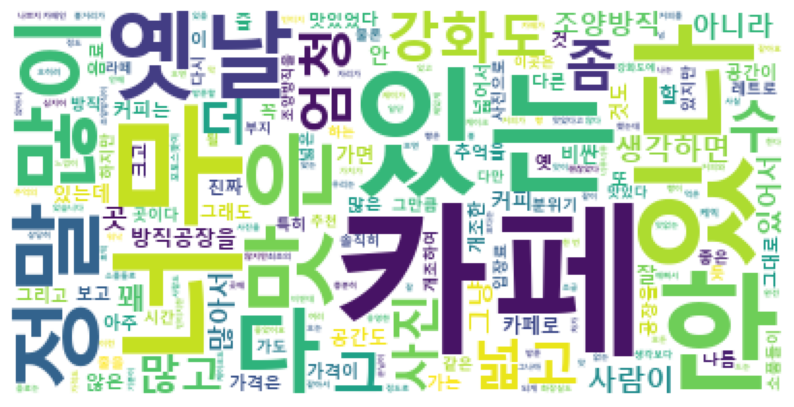

In [160]:
import string
from emoji import core
from wordcloud import WordCloud

font_path = "C:\Windows\Fonts\malgunbd.ttf"
test = []
d_z8A3s7Yr8Skr['리뷰내용'].apply(lambda x: test.append(x))
test = " ".join(test)
test = test.translate(str.maketrans(".", " ", string.punctuation)).replace(" ͡°", " ").replace("ㅠ", " ").replace("ㅋ", " ").replace(" ͜ʖ ", " ")
test = core.replace_emoji(test).replace("ㅎ", " ").strip()
#  wordcloud 만들기
wc = WordCloud(
    max_words = 200,
    font_path = font_path,
    background_color = 'white',
    stopwords = []
    ).generate(test)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.savefig("test.png")
# plt.close()


                                                                                               
                                                                                               

'인테리어만으로도 올 가치가 있다 강화도 강화읍에 위치한조양방직 다녀왔어요11시 오픈전에 도착했는데도이미 많이 웨이팅 중이었습니다조양 방직 입구로 들어가면 바로주문하는 게 아니라 한 바퀴 돌아빵과 커피를 주문했어요방직 안에 전시관처럼 많은포토존이 있었습니다주문하는 건물에도 자리가 있지만별관이나 안쪽에 충분히 많은자리가 있었습니다소금 빵이 유명하다고 해서 소금 빵과명란 바게트 에그타르트를 주문하고아메리카노까지 주문했습니다커피가 가격이 상당히 비싼 편이었으나 각종 볼거리를 생각하니나쁘지 않아고 커피는 딱히 맛있진않았고 빵들은 맛있었어요전체적으로 볼 곳과 포토존이 많아데이트하기 좋아 보였어요 비오는 날 방문했습니다.주차장은 넓지도 작지도 않은 크기였는데워낙 차량으로 방문하는 방문객이 많아서 그에 비교한다면 모든 차량을 소화하기엔 힘들어 보입니다.워낙 쑥라떼를 좋아해서 주문해 봤는데너무 맛있어서 깜짝 놀랬네요.쑥라떼에 거부감 없으신 분들은 추천드립니다!내부는 아주 넓고 소소한 볼거리가 많더라구요^^가족들과 들리시면 좋은 추억이 될거 같습니다. 맛있는 빵, 다양한 볼거리 그리고 사악한 가격 너무너무너무 재미있고, 볼 것도 다양하고, 음료랑 빵도 맛있고, 사진 찍고 싶은 곳도 한가득이라서, 한 번 들어갔다가 시간 가는 줄 모르고 놀다 나왔던 강화도의 카페다.조양방직이라고 예전에 방직 공장을 사들여서 그곳을 카페로 만들었다고 하는데... 그 옛날 분위기도 생생하게 살아있고, 그때의 소품 같은 것도 그대로 남아 있어서 약간 박물관이나 미술관 분위기가 나기도 한다.카페 공간도 빛으로 반짝반짝 예뻐서 사진 찍으면 진짜 예쁘게 나옴. 누구랑 같이 가도 재미있다고 할 법한 곳이었다. 담에 강화도 가면 꼭 다시 들러야겠다고 생각한 곳이다. 까눌레 3,000원호롱소세지 7,000원생딸기라떼 8,000원강화도 카페 검색하면 젤 먼저 나오는 조양방직방직공장을 리모델링해서 만든 카페인데규모가 어마어마해요입구 들어가자마자 사람들이 왼쪽으로 들어가길래따라갔더니 옛날 물건들로 인테리어 해놓은 공